## 발표01

* pandas를 활용한 datetime 변수 처리하기 (datetime 변환 방법, data resampling 등)
    - 시계열 데이터에서 유용한 pandas datetime 라이브러리 활용법. 
    - datetime 어떤 식으로 사용하는지 코드와 함께 등.

### datetime 이해하기

[pandas.DatetimeIndex — pandas 0.25.2 documentation](https://pandas.pydata.org/pandas-docs/version/0.25.2/reference/api/pandas.DatetimeIndex.html)

In [1]:
pd.datetime?

C:\Users\hongs\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:1737: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  return getattr(obj, attrname)


![dt-index](./img/dt-index.png)

In [2]:
# library load
import pandas as pd
import numpy as np
import datetime as dt

In [4]:
# data load
train = pd.read_csv('./data/train.csv')
train.shape

(3362796, 8)

#### object -> datetime

In [9]:
train.date.head()

0    2016-12-14
1    2016-12-14
2    2016-12-19
3    2016-12-19
4    2016-12-19
Name: date, dtype: object

In [12]:
train['date_dt'] = pd.to_datetime(train['date'])
train['date_dt'].head(1)

0   2016-12-14
Name: date_dt, dtype: datetime64[ns]

#### year, month, day, hour, min, sec, dayofweek

In [13]:
train['date_dt'].dt.year

0          2016
1          2016
2          2016
3          2016
4          2016
           ... 
3362791    2018
3362792    2018
3362793    2018
3362794    2018
3362795    2018
Name: date_dt, Length: 3362796, dtype: int64

In [14]:
train['year'] = train['date_dt'].dt.year
train['month'] = train['date_dt'].dt.month
train['day'] = train['date_dt'].dt.day
train['hour'] = train['date_dt'].dt.hour
train['min'] = train['date_dt'].dt.minute
train['sec'] = train['date_dt'].dt.second
train['dayofweek'] = train['date_dt'].dt.dayofweek

train.head(1)

,store_id,date,time,card_id,amount,installments,days_of_week,holyday,date_dt,year,month,day,hour,min,sec,dayofweek
0,0,2016-12-14,18:05:31,d297bba73f,5,NaN,2,0,2016-12-14,2016,12,14,0,0,0,2


In [16]:
import matplotlib.pyplot as plt 
import seaborn as sns

sns.set()

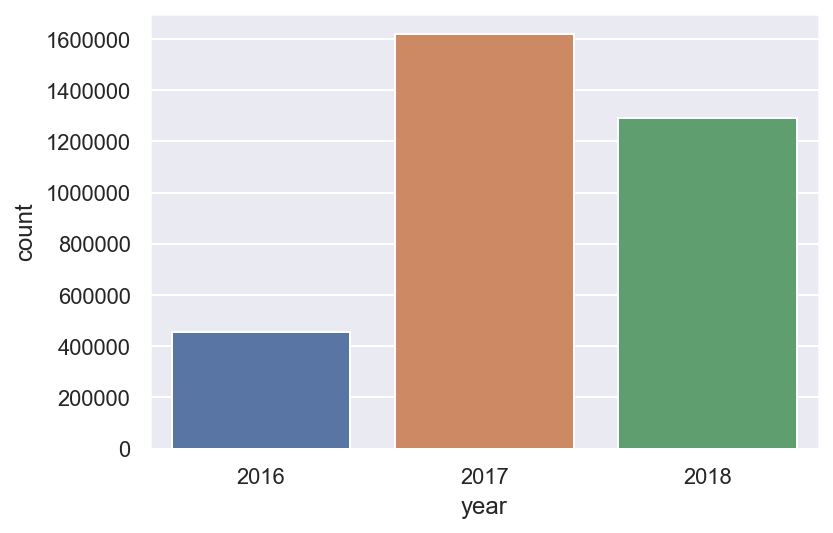

In [18]:
sns.countplot(train['year'])

구매가 가장 많이 일어난 연도는 **2017년** 입니다.

7     334019
6     332230
5     331971
4     318366
3     310753
12    264376
1     258378
2     250079
10    244391
9     240458
11    239853
8     237922
Name: month, dtype: int64


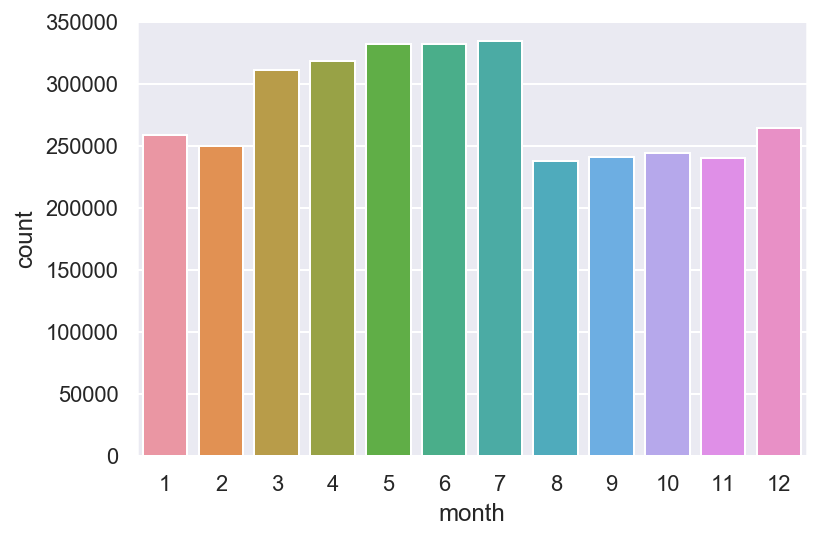

In [42]:
print(train['month'].value_counts().sort_values(ascending=False))
sns.countplot(train['month'])

구매가 가장 많이 이뤄진 달은 **7월** 입니다.

13    114093
21    113516
14    113357
25    113049
24    112540
Name: day, dtype: int64


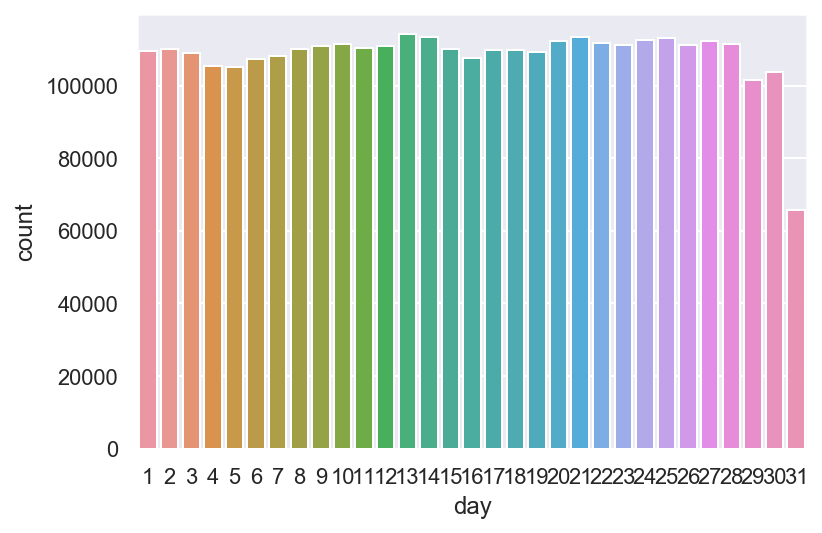

In [44]:
print(train['day'].value_counts().sort_values(ascending=False).head())
sns.countplot(train['day'])

In [38]:
print(train['hour'].value_counts())
print(train['min'].value_counts())
print(train['sec'].value_counts())

0    3362796
Name: hour, dtype: int64
0    3362796
Name: min, dtype: int64
0    3362796
Name: sec, dtype: int64


시, 분, 초 데이터는 없습니다.

5    533093
4    511031
3    472820
2    471573
1    467276
6    462156
0    444847
Name: dayofweek, dtype: int64


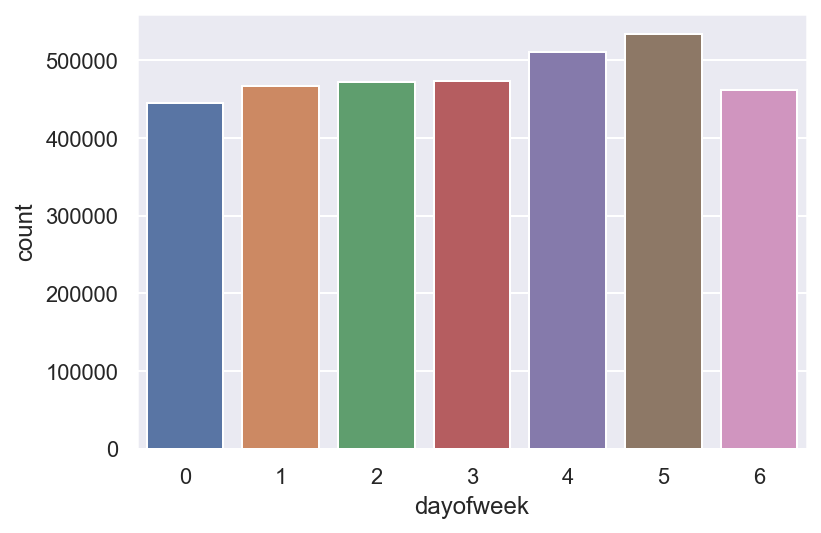

In [45]:
print(train['dayofweek'].value_counts().sort_values(ascending=False))
sns.countplot(train['dayofweek'])

**금요일과 토요일**에 구매가 가장 많이 일어났으며,<br>
일요일에 가장 적습니다. 